<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 12. Saint-Venant
## Saint-Venant equations
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

## Derivation of **Saint-Venant equations**

**Navier-Stokes equation** for a viscous fluid is defined as
$$
\rho \frac{\partial \vec{u}}{\partial t}
+ \rho \left( \vec{u} \cdot \nabla \right) \vec{u}
= - \nabla p
+ \eta \Delta \vec{u}
+ \rho \vec{g}
$$
with:

- $\vec{u}$ [m/s] is the velocity vector,
- $\rho$ [kg/m$^3$] fluid density,
- $\eta$ [Pas] fluid dynamic viscosity,
- $\vec{g}$ [m/s$^2$] gravitational acceleration,
- $p$ [Pa] pressure,
- $t$ [s] time, 
- $\nabla$ [1/m] the Nabla operator, and
- $\Delta$ [1/m$^2$] the Laplace operator. 

Additionally, the **continuity equation** holds:
$$
\frac{\partial \rho}{\partial t}
+ \nabla \cdot \left( \rho \vec{u} \right) = 0
$$

We now restrict the derivation to **one dimension**, $x$, along a channel,
drop the diffusion term,
and introduce a **viscous drag force** instead.
The channel can be inclined with angle $\alpha$, thus gravity needs to be projected.
The the Navier-Stokes equation reduces to:
$$
\rho \frac{\partial u_x}{\partial t}
+ \rho u_x \frac{\partial u_x}{\partial x}
= - \frac{\partial p}{\partial x}
+ \rho g \left( s_0 - s_f \right)
$$
with
- $u_x$ [m/s] the velocity along the channel,
- $s_f$ [-] is the frictional slope,
- $s_0=\sin\alpha$ [-] is the channel slope.
The cross section $A$ [m$^2$] defines through flow, thus needs to be conserved:
$$
\frac{\partial A}{\partial t}
+ \frac{\partial \left( A u_x \right)}{\partial x} = 0
$$
with - $A$ [m$^2$] the cross-sectional area.

Finally, withthe assumption of a **hydrostatic pressure distribution**, $p=\rho g h$,
with $h$ [m] the water depth,
we can reformulate the pressure gradient, $\frac{\partial p}{\partial x}=\rho g \frac{\partial h}{\partial x}$.

We then arrive at the **Saint-Venant equations**:
$$
\fbox{$
\begin{array}{rcl}
\frac{\partial u_x}{\partial t}
+ u_x \frac{\partial u_x}{\partial x}
+ g \frac{\partial h}{\partial x}
+ g \left( s_f - s_0 \right) &=& 0 \\
\frac{\partial A}{\partial t}
+ \frac{\partial \left( A u_x \right)}{\partial x} &=& 0
\end{array}
$}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

----
## Single sloping channel

$$
\begin{array}{rcl}
A &=& b h \\
P &=& 2 (b+h) \\
R_h &=& \frac{A}{P} \\
u &=& \frac{1}{n} \left( R_h \right)^{\frac{2}{3}} \left( S_f \right)^{\frac{1}{2}}
\end{array}
$$

In [2]:
L  = 29000
b  = 120
S0 = 0.00061
n  = 0.023
h0 = 0.86
Q0 = 10
nx = 101
g  = 9.81

x = np.linspace(0,L,nx)
dx = (x.max()-x.min()) / (nx-1)
print(max(x))
print(np.amax(x))


29000.0
29000.0


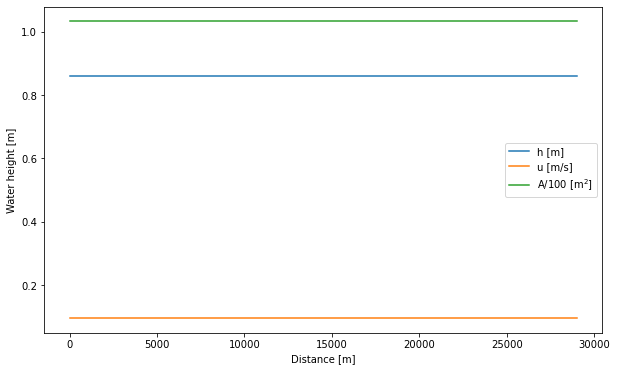

In [5]:
h = h0*np.ones(nx)
A = b*h
u = Q0/A[0]*np.ones(nx)

plt.figure(figsize=(10,6))
plt.xlabel('Distance [m]')
plt.ylabel('Water height [m]')
plt.plot(x,h,label='h [m]')
plt.plot(x,u,label='u [m/s]')
plt.plot(x,A/100,label='A/100 [m$^2$]')
plt.legend()

2.000000000000067 0.011983861205056285
4.000000000000269 0.011953910855857133
6.000999999999739 0.011914288811456166
8.00099999999893 0.011916904547240639
10.000999999998122 0.011948110241084983
12.000999999997314 0.011969840548266567
14.000999999996505 0.011977645286450345
16.000999999995695 0.01197681986075905
18.00099999999489 0.01197523730667265
20.00099999999771 0.011973083580095386


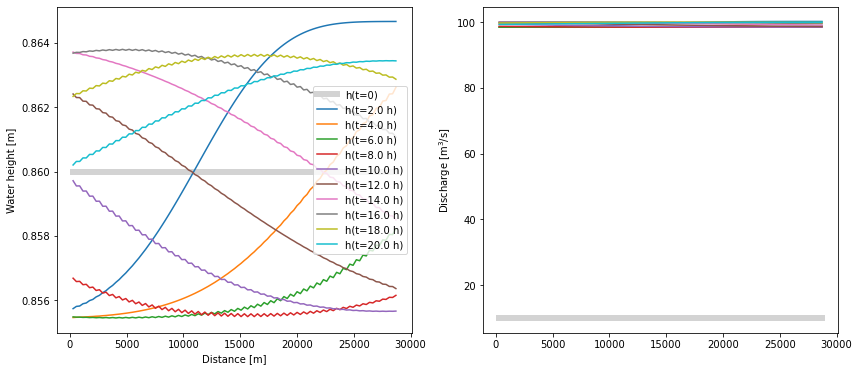

In [7]:
time = 0.
dt   = 0.001*3600
TMAX = 21*3600
dtplot = 2.00*3600
tplot  = dtplot
fig,axs = plt.subplots(1,2,figsize=(14,6))
axs[0].set_xlabel('Distance [m]')
axs[0].set_ylabel('Water height [m]')
axs[1].set_ylabel('Discharge [m$^3$/s]')
axs[0].plot(x[1:-1],h[1:-1],linewidth=6,color='lightgray',label='h(t=0)')
axs[1].plot(x[1:-1],u[1:-1]*A[1:-1],linewidth=6,color='lightgray',label='u(t=0)')

while (time < TMAX):
    # advance time
    time = time+dt
    # boundary conditions (Neumann)
    A[0]  = A[1]
    A[-1] = A[-2]
    u[0]  = u[1]
    u[-1] = u[-2]
    #if (time > 5*3600 and time < 10*3600):
    #    u[0] = 2*Q0/A[0]
    #else:
    #    u[0] = Q0/A[0]
    Co   = np.max(np.abs(u))*dt/dx
    
    Aold = A
    uold = u
    hold = h
    for i in range(1,A.shape[0]-1):
        A[i] = Aold[i] - dt/2/dx*((Aold[i+1]*uold[i+1])-(Aold[i-1]*uold[i-1]))
        Rh   = Aold[i]/(b+2*hold[i])
        Sf   = uold[i]**2 * n**2 * Rh**(-4/3)
        u[i] = uold[i] - uold[i]*dt/2/dx*(uold[i+1]-uold[i-1]) \
                       - g*dt/2/dx*(Aold[i+1]-Aold[i-1])/b \
                       - g*(Sf-S0)
    h = A / b
    # plot
    if (time >= tplot):
        print(time/3600,Co)

        axs[0].plot(x[1:-1],h[1:-1],label='h(t='+str(round(time/3600,2))+' h)')
        axs[1].plot(x[1:-1],u[1:-1]*A[1:-1],label='u(t='+str(round(time/3600,2))+' h)')
        #plt.plot(x,u,label='u [m/s]')
        #plt.plot(x,A/100,label='A/100 [m$^2$]')
        axs[0].legend()
        tplot = tplot + dtplot
    #fig.tight_layout()



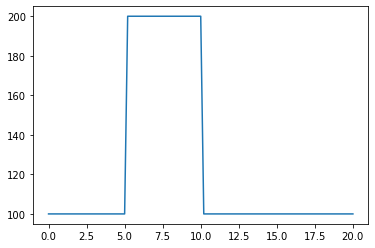

In [16]:
Qb = 100
Qp = 200
t1 = 5
t2 = 10
t = np.linspace(0,20,101)
Q = Qb*np.ones(len(t))
Q  = np.where(t > t1, Qp, Qb)
Q  = np.where(t > t2, Qb, Q)

plt.plot(t,Q)